In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def get_new_records(arr):
    x, y = [], []
    record = 0
    if len(arr) > 0:
        record = arr[0]
    for i, val in enumerate(arr):
        if val > record:
            record = val
            y.append(val)
            x.append(i)
    
    return x, y

def moving_average(arr, window=10):
    res = []
    if len(arr) > window:
        for i in range(0, len(arr) - window):
            values = arr[i:i+window]
            res.append(sum(values)/len(values))
    return res

Highest values:
Min: 5.0467463
Avg: 28.133488726615905
Max: 155.1077


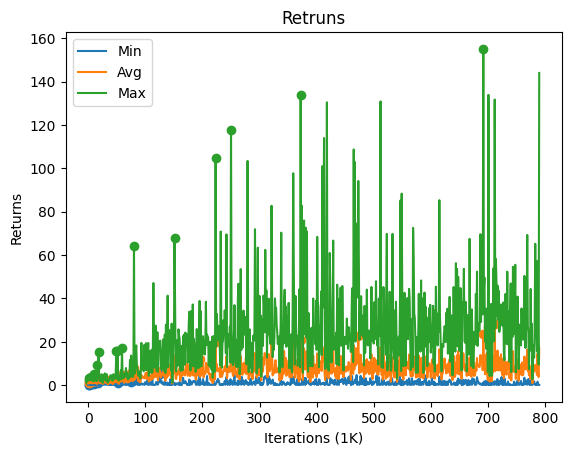

In [20]:
# Metrics: returns
df_returns = pd.read_csv('metrics-returns.csv')
print(f'Highest values:')
print(f'Min: {df_returns["min"].max()}')
print(f'Avg: {df_returns["avg"].max()}')
print(f'Max: {df_returns["max"].max()}')

plt.title('Retruns')
plt.plot(df_returns['min'])
plt.plot(df_returns['avg'])
plt.plot(df_returns['max'])
plt.legend(['Min', 'Avg', 'Max'])
xs, ys = get_new_records(df_returns['min'])
plt.scatter(xs, ys)
xs, ys = get_new_records(df_returns['avg'])
plt.scatter(xs, ys)
xs, ys = get_new_records(df_returns['max'])
plt.scatter(xs, ys)
plt.ylabel('Returns')
plt.xlabel('Iterations (1K)')
plt.show()

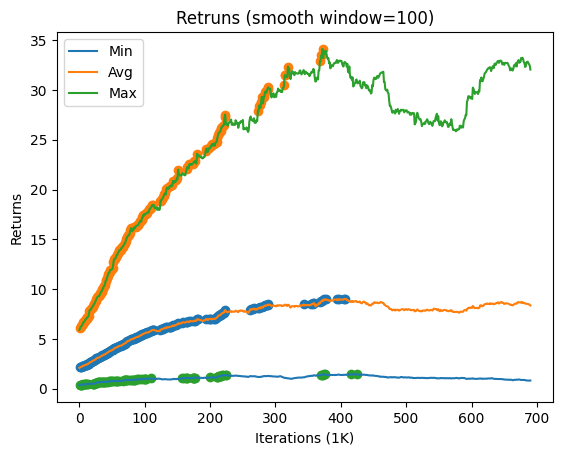

In [21]:
window = 100
return_mins = moving_average(df_returns['min'], window=window)
return_avgs = moving_average(df_returns['avg'], window=window)
return_maxs = moving_average(df_returns['max'], window=window)

plt.title(f'Retruns (smooth window={window})')
plt.plot(return_mins)
plt.plot(return_avgs)
plt.plot(return_maxs)
plt.legend(['Min', 'Avg', 'Max'])
xs, ys = get_new_records(return_avgs)
plt.scatter(xs, ys)
xs, ys = get_new_records(return_maxs)
plt.scatter(xs, ys)
xs, ys = get_new_records(return_mins)
plt.scatter(xs, ys)
plt.ylabel('Returns')
plt.xlabel('Iterations (1K)')
plt.show()

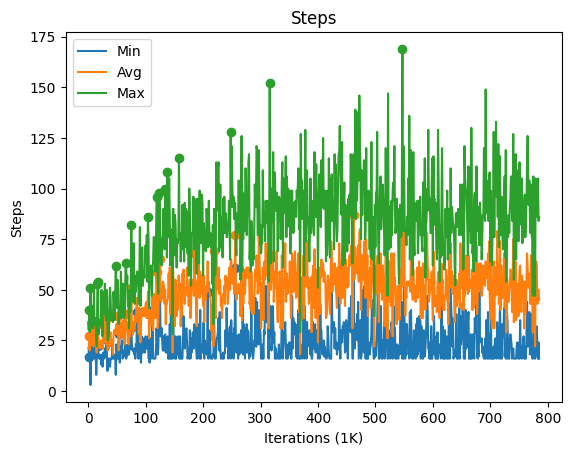

In [17]:
# Metrics: steps
df_steps = pd.read_csv('metrics-steps.csv')

plt.title('Steps')
plt.plot(df_steps['min'])
plt.plot(df_steps['avg'])
plt.plot(df_steps['max'])
plt.legend(['Min', 'Avg', 'Max'])
xs, ys = get_new_records(df_steps['min'])
plt.scatter(xs, ys)
xs, ys = get_new_records(df_steps['avg'])
plt.scatter(xs, ys)
xs, ys = get_new_records(df_steps['max'])
plt.scatter(xs, ys)
plt.ylabel('Steps')
plt.xlabel('Iterations (1K)')
plt.show()

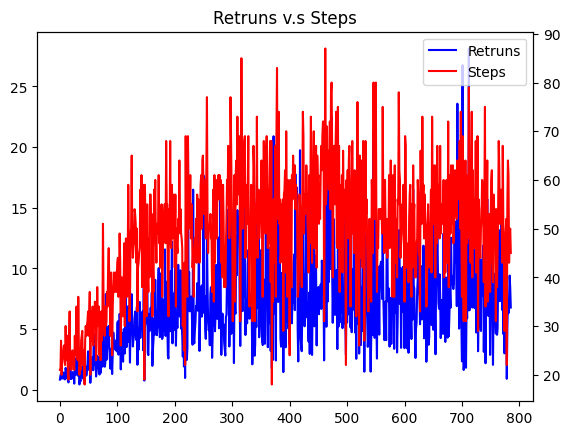

In [18]:
# Retruns v.s Steps
plt.title('Retruns v.s Steps')
ax1 = plt.subplot()
l1, = ax1.plot(df_returns['avg'], color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(df_steps['avg'], color='red')
plt.legend([l1, l2], ["Retruns", "Steps"])
plt.xlabel('Iterations (1K)')
plt.show()